# COGS 108 - Final Project 

# Overview

This study attempted to see if there was a relationship between a resturant's food safety and yelp rating, by  conducting a  Mann-Whitney U Test between the variables Yelp Rating, and Violation Severity. Ultimately I rejected the null hypothesis, and found that there was a difference in distributions between Yelp Rating, and Violation Severity. The alpha was set to 0.05, and the calculated p value was epqual to 0.0, therefore rejecting the null hypothesis.

# Name & PID

- Name: David Hornaday
- PID: A13508342

# Research Question

Can yelp reviews be used as a metric to judge a resturant's health violation safety? In other words will resturant's with higher violation point scores, be given lower ratings on yelp?

## Background and Prior Work

Previous research in regards to health inspections have found a genral trend upwards or an increase in the overall means for resturants in Tennessee from 1993-2000. In, "Restaurant Inspection Scores and Foodborne Disease," Timothy Jones, Boris Pavlin, Bonnie LaFleur, L. Amanda Ingram, and William Schaffner conducted an analytical study on health inspections data in Tennesse from January 1993 - April 2000. During this time they saw a rise in mean health inspection scores from 80.2 - 83.8. Mean scores for individual inspectors rose from 69-92. Finally they found that food establishments that scored less that 60 saw a mean improvement of 16 points. Essentially with the existance of Health Inspections, we can see a rise in overall scores every year and a general positive trend between time and scores. 

Previous research in regards to Yelp, illustrates that Yelp ratings for individual non-chain resturaunts correspond with revenue. In, "Reviews, Reputation, and Revenue: The Case of Yelp.com," Michael Luca implements a discontinuity approach to prove his hypothesis that Yelp ratings have as he describes a casual impact on revenue. Luca found that a one star increase in a Yelp rating corresponded to a 5-9% increase in revenue. His study also suggest that humans respond to more visible quality changes, and when a rating contains more information. Essentially there is data suggesting that overtime there is a general trend for health inspections scores to increase, as well as data suuggesting that Yelp reviews can correspond to more revenue. Overall it is possible that these could lead to higher quality of resturants as reviews are taken seriously by owners. Maybe there then exists some correlation between yelp reviews and health inspection scores.


References (include links):
- 1)"Restaurant Inspection Scores and Foodborne Disease"
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/
- 2)"Reviews, Reputation, and Revenue: The Case of Yelp.com"
https://www.hbs.edu/faculty/Publication%20Files/12-016_a7e4a5a2-03f9-490d-b093-8f951238dba2.pdf

# Hypothesis


H0: There is no difference between distributions of Yelp rating and health inspection violation point score 
(p <= alpha).

Ha: There is a difference between distributions of Yelp rating and health inspection violation point score 
(p > alpha ).

# Dataset(s)

For this study I will be using three datastes from Wake County, North Carolina: 'inspections.csv','yelp.csv',and 'violations.csv'


##### 'inspections.csv'

-This data contains information on the resturants in Wake County, and their respective scores as well as   general information relating to each resturant such as phone number, address, zip code, and facility type. The data also contains information on the health inspectors, and previous health inspection dates. This data is important because health inspection scores themselves are the ideal metric for judging a resturant's health safety. 

##### 'yelp.csv'

-This data set contains information on the resturants in Wake County and their respective ratings on Yelp. It also contains information on the amount of reviews as well as the relative price and classification on the type of food the resturaunt serves. Finally the data also contains information on the address and zip code as well as phone number for each resturant.

##### 'violations.csv'

-This data 



# Setup

In [1]:
#Imports

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import patsy 
import statsmodels.api as sm
from scipy.stats import mannwhitneyu


The cell above shows the imports I will be using.

In [2]:
df_inspections = pd.read_csv('inspections.csv')
df_yelp_reviews = pd.read_csv('yelp.csv')
df_violations = pd.read_csv('violations.csv')

In the cell above I create three dataframes: df_inspections, df_yelp_reviews, and df_violations all corresponding to their respective csv files of the same name. These will be cleaned and merged later. 

# Data Cleaning

Essentially I want to tidy up and standardize the data as best as I can before combining. The simplist way to combine my two dataframes will be by using the resturant's address and hsisid as I believe as there exists the least amount of variability between datasets in these categories. 

In [3]:
#This cell defines a function that can then later be called upon to standardize variability
#in string entries

def standardize_string(string):
    
    string = str(string)
    string = string.lower()
    string = string.strip()
    
    return string

The cell above established a general function that will be later called upon to standardize the names and addresses for the 'inspections.csv' and 'yelp.csv' dataframes. This will be essential in ensuring that they are accurately merged together. Essentially the code first converts any non string entry to a string, which in the case of this data set will be mostly NaN values, however it will also convert interger entries to string. The function then makes all address entries lower case as there is some variabilty in capitalization between data sets, and finally the function strips the white space returning the standardized string. 

In [4]:
#Inspections
#This code drops certain data that is not relavant to the study or may violate the ethics of the study
#For example inspector's names are private information that is not relevant to the study
#Also including both address as well as lattitude and longitude coordinates is a bit redundant

df_inspections = df_inspections.drop(['date','phonenumber','address2','x','y','geocodestatus','inspectedby','postalcode','previous_inspection_by_same_inspector','previous_inspection_date','inspector_id','restaurantopendate'], axis=1)  

df_inspections = df_inspections.drop(['num_critical_previous','num_non_critical_previous','num_critical_mean_previous','num_non_critical_mean_previous','avg_neighbor_num_critical','avg_neighbor_num_non_critical','top_match','second_match','critical'], axis=1)

#Dropping rows with missing data only in the 'name' or 'score' columns 

df_inspections = df_inspections.dropna(subset = ['name','address1'])

#Applying standardizing_string function to 'name' column

df_inspections['name'] = df_inspections['name'].apply(standardize_string)

#Applying standardizing_string function to 'address1' column

df_inspections['address1'] = df_inspections['address1'].apply(standardize_string)

The cell above dropped rows in df_inspections that had potentially sensitive information in regards to the official health inspector, as well as superfluous information such as phone numbers, as well as certain numerical data which in theory could be of use in a very much more involved an in depth study, however given restraints of this project, certain variables were eliminated in order to explore my research question further. The cell also drops any rows that are missing entries in the name or address column, and applys the standardize_string function to these two columns as well.

In [5]:
#Yelp
#This code drops certain data that is not relavant to the study or may produce unnecessary overlap
#For example additional zip code and name columns will not be needed after merge so
#they can be dropped initially

df_yelp_reviews = df_yelp_reviews.drop(['id','latitude','longitude','phone'], axis=1)

df_yelp_reviews = df_yelp_reviews.drop(['zip_code', 'name'], axis=1)

#Dropping rows with missing data in the 'address1' column

df_yelp_reviews = df_yelp_reviews.dropna(subset = ['address1'])

#Applying standardizing_string function to 'address1' column

df_yelp_reviews['address1'] = df_yelp_reviews['address1'].apply(standardize_string)



The cell above drops overlap or unneccessary columns in df_yelp_reviews that were unnecessary to the study, because they presented overlap data. The cell als dropped any rows missing an address entry before applying the standardize_string function.

In [6]:
#Violations

df_violations = df_violations.drop(['X.objectid','statecode','inspectedby','comments','inspectdate','questionno','cdcdataitem'], axis=1)


The cell above drops unneccessary columns in df_violations. Because there is no variabilty in df_violations and df_inspections hsisid numbers no steps need to be made to reduce variabilty. 

In [7]:
#Inspections, Yelp, and Violations
#This code will create a new dataframe that contains data on both the yelp scores and health code inspection scores

df_inspections_vs_yelp = pd.merge(df_inspections, df_yelp_reviews, left_on='address1', right_on='address1' )


df_insp_violations_yelp = pd.merge(df_inspections_vs_yelp, df_violations, left_on='hsisid', right_on='hsisid' )


The cell above creates a new dataframe, df_inspections_vs_yelp, by merging df_inspections and df_yelp_reviews by their address1 columns. Then another dataframe is made called df_insp_violations_yelp by merging the new df_inspections_vs_yelp and df_violations by hsisid number. The cell below displays the head of the new dataframe. 

In [8]:
df_insp_violations_yelp.head()

,hsisid,name,address1,city,state,days_from_open_date,facilitytype,zip,type,description,...,category,critical,violationcode,severity,shortdesc,pointvalue,observationtype,violationtype,count,cdcriskfactor
0,4092015191,taste of china,6209 rock quarry rd,raleigh,NC,1509,Restaurant,27610,Inspection,NaN,...,Employee Health,Yes,2-201.11(A),Priority,"Management, employees knowledge; responsibilit...",0,Out,CDI,NaN,NaN
1,4092015191,taste of china,6209 rock quarry rd,raleigh,NC,1509,Restaurant,27610,Inspection,NaN,...,Employee Health,Yes,2-103.11(M),Priority Foundation,"Management, employees knowledge; responsibilit...",1,Out,R,NaN,NaN
2,4092015191,taste of china,6209 rock quarry rd,raleigh,NC,1509,Restaurant,27610,Inspection,NaN,...,Employee Health,Yes,2-103.11(M),Priority Foundation,"Management, employees knowledge; responsibilit...",0,Out,CDI,NaN,NaN
3,4092015191,taste of china,6209 rock quarry rd,raleigh,NC,1509,Restaurant,27610,Inspection,NaN,...,Food Identification,No,3-302.12,Core,Food properly labeled; original container,0,Out,NaN,NaN,NaN
4,4092015191,taste of china,6209 rock quarry rd,raleigh,NC,1509,Restaurant,27610,Inspection,NaN,...,Food Temperature Control,No,3-501.13,Core,Approved thawing methods used,0,Out,NaN,NaN,NaN


In [9]:
def anon_zip(string):

    string = str(string)
    string = string.strip()
    string = (string[:-2]+'**')
    
    return string


This code was written to be called upon to disguise the last two digits of a zip code. 

In [10]:
def standardize_price(string):
    
    string = str(string)
    string = string.strip()
    
    if string == '$':
        string = string.replace('$', '10')
    elif string == '$$':
        string = string.replace('$$', '30')
    elif string == '$$$':
        string = string.replace('$$$', '60')
    elif string == '$$$$':
        string = string.replace('$$$$', '99')
    else:
        string = 'NaN'
        
    if string.isnumeric() and int(string) < 100:
        string = int(string)
    else:
        string = np.nan

    return string
        

The cell above creates a function called standardize_price which takes Yelps ordinal variables for price and converts them to an integer value which shows the general price Yelp's categorical variables were defined by. 

In [11]:
df_insp_violations_yelp = df_insp_violations_yelp.rename(columns={"score": "health_inspections_score","rating": "yelp_rating","price": "price_dollars","facilitytype": "facility_type","shortdesc": "violation_desc","pointvalue": "point_value","violationtype": "violation_type","cdcriskfactor": "cdc_risk_factor"})

The cell above just renames columns so that there isn't variance between data sets and it is a more uniform dataframe. 

In [12]:
df_insp_violations_yelp = df_insp_violations_yelp[['name','city','state','zip','facility_type','health_inspections_score','yelp_rating','review_count','price_dollars','violation_type','point_value','cdc_risk_factor','num_critical','num_non_critical']]

The cell above sets the dataframe to only include the columns I will be using for analysis after the initial merge I felt as though there were too many columns that would not be of use in my data explorations although they may be useful for a more in depth study. 

In [13]:
#Drops rows with data in 'health_inspections_score','yelp_rating','review_count','violation_type' columns

df_insp_violations_yelp = df_insp_violations_yelp.dropna(subset = ['health_inspections_score','yelp_rating','review_count','violation_type'])

#Applying anon_zip function to 'zip' column

df_insp_violations_yelp['zip'] = df_insp_violations_yelp['zip'].apply(anon_zip)

#Applying standardize_price function to 'price_dollars' column

df_insp_violations_yelp['price_dollars'] = df_insp_violations_yelp['price_dollars'].apply(standardize_price)

#Applying standardize_string function to 'violation_type' column

df_insp_violations_yelp['violation_type'] = df_insp_violations_yelp['violation_type'].apply(standardize_string)

#Create a new column categorizing violations with point scores less than two and those greater than two 

df_insp_violations_yelp['violation_severity'] = df_insp_violations_yelp['point_value'].apply(lambda x: 0 if x<2 else 1)



The cell above drops rows in the new datframe with missing values, as well as applys several standardizing functions. The anon_zip removes the last two digits of the zip code column. The standardize_price function converts Yelps cordinal string values to be an ordinal integer value of similar meaning. The standardize_string function is applied to the 'violation_type' column. A new column categorizing violations with point scores less than two and those greater than two is created in the dataframe. This essentially can be used to categorize violations as relatively severe or unsevere. 

In [14]:
df_insp_violations_yelp.duplicated().sum()

390561

The cell above illustrates that there are over 390561 rows which contain duplicate data these can then be dropped by the cell below, keeping the first duplicate so one copy of the duplicate data is saved. 

In [15]:
df_insp_violations_yelp = df_insp_violations_yelp.drop_duplicates(keep='first')

The cell below displays df_insp_violations_yelp after all the transformations have been applied.

In [16]:
df_insp_violations_yelp

,name,city,state,zip,facility_type,health_inspections_score,yelp_rating,review_count,price_dollars,violation_type,point_value,cdc_risk_factor,num_critical,num_non_critical,violation_severity
0,taste of china,raleigh,NC,276**,Restaurant,97.0,3.0,4,30.0,cdi,0,NaN,4,8,0
1,taste of china,raleigh,NC,276**,Restaurant,97.0,3.0,4,30.0,r,1,NaN,4,8,0
14,taste of china,raleigh,NC,276**,Restaurant,97.0,3.0,4,30.0,r,0,Improper Holding,4,8,0
17,taste of china,raleigh,NC,276**,Restaurant,97.0,3.0,4,30.0,cdi,1,NaN,4,8,0
18,taste of china,raleigh,NC,276**,Restaurant,97.0,3.0,4,30.0,cdi,0,Improper Holding,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063780,wendy's #6324,morrisville,NC,275**,Restaurant,97.0,2.5,3,10.0,cdi,1,NaN,3,1,0
1063783,wendys 6301,apex,NC,275**,Restaurant,97.0,3.5,4,10.0,cdi,0,NaN,5,2,0
1063786,wendys 6301,apex,NC,275**,Restaurant,97.0,3.5,4,10.0,cdi,1,Improper Holding,5,2,0
1063788,wendys 6301,apex,NC,275**,Restaurant,97.0,3.5,4,10.0,vr,1,NaN,5,2,0


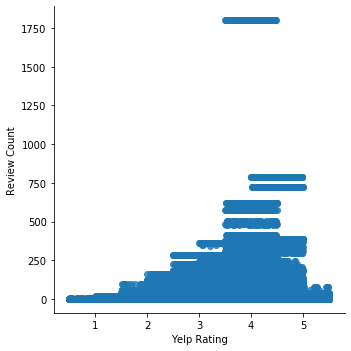

In [17]:
sns.lmplot(x = 'yelp_rating',y = 'review_count',data = df_insp_violations_yelp,fit_reg = False, height = 5 , aspect = 1, x_jitter = 0.5, y_jitter = 0.5)
plt.xlabel('Yelp Rating')
plt.ylabel('Review Count');

Essentially the cell above is here to determine if any of the Yelp Data needs to be further modified to be less biased. In theory Cells with low review counts would either perform very well or very poorly if the data was completely biased, but the values are filled in across the lower review count. This means there is an equal amount of resturants with a low amount of ratings in each category of the Yelp rating statistic. Therefore there likely doesn't exist a statistically significant amount of bias in the data set, as with publically reviewed things the bias would balance out with more reviews. However, there is a slight trend in a higher rating as the amount of reviews increase.

Before moving on to visualizing and testing the hypothesis it was important for me to visualize the data distributions for both the 'point_value' and 'yelp_rating' columns. Which will be shown in the cells below. 

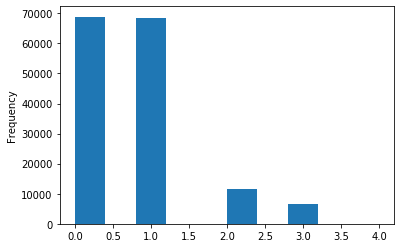

In [18]:
df_insp_violations_yelp['point_value'].plot.hist(bins = 10)
f1 = plt.gcf()

The cell above shows the distribution of data for the 'point_value'column in df_insp_violations_yelp. As you can clearly tell the distribution is not normal, and is very positively skewed. Almost all data is below the severity threshold I established earlier and almost all of the dat is within the 0 or 1 point range.

In [19]:
df_insp_violations_yelp['point_value'].unique()

array([0, 1, 3, 2, 4])

In [20]:

point_value_rank = df_insp_violations_yelp['point_value'].replace({0:1,1:2,2:3,3:4,4:5})

df_insp_violations_yelp['point_value_rank'] = point_value_rank

size = len(df_insp_violations_yelp['point_value_rank'])-1

df_insp_violations_yelp['point_value_rank'] = df_insp_violations_yelp['point_value_rank'].rank(method= 'min').apply(lambda x: (x-1)/size)


I tried many different approaches to normalize this distribution. Initially I tried a logarithmic approach, as well as normalization approach which involved me defining a function that essentially subtracted the min value and divided by the max - min. The last approach I tried was Percentile Linearization, which I left depicted in the histogram below. However, every method I attempted failed, and that is because most methods are designed to handle outliers in data or slight skewness, which is not the case for this particular distribution.

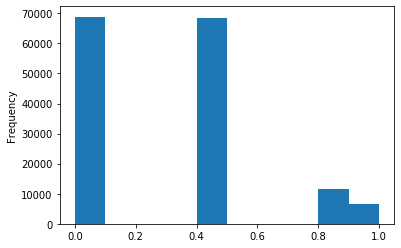

In [21]:
df_insp_violations_yelp['point_value_rank'].plot.hist(bins = 10)
f2 = plt.gcf()

The cell above shows the distribution of data for the 'yelp_rating' column in df_insp_violations_yelp. As you can clearly tell the distribution is not normal as well, and is negatively skewed in this case. It was at this point a realized that a linear regressions test between the two dataframes was likely not possible and I would have to change my approach.

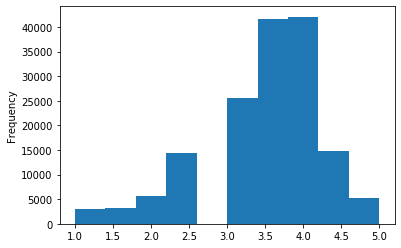

In [22]:
df_insp_violations_yelp['yelp_rating'].plot.hist(bins = 10)
f3 = plt.gcf()

In [23]:
yelp_rating_rank = df_insp_violations_yelp['yelp_rating'].replace({1.0:1,1.5:2,2.0:3,2.5:4,3.0:5,3.5:6,4.0:7,4.5:8,5.0:9})

df_insp_violations_yelp['yelp_rating_rank'] = yelp_rating_rank

df_insp_violations_yelp['yelp_rating_rank'].unique()

array([5., 7., 9., 6., 8., 4., 3., 1., 2.])

In [24]:
violation_severity_rank = df_insp_violations_yelp['violation_severity'].replace({0:1,1:2})

df_insp_violations_yelp['violation_severity_rank'] = violation_severity_rank


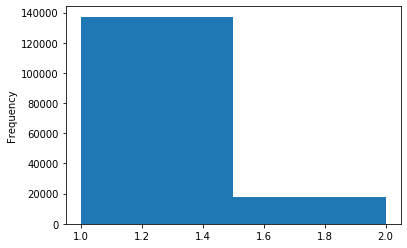

In [25]:
df_insp_violations_yelp['violation_severity_rank'].plot.hist(bins = 2)
f4 = plt.gcf()

Ultimately for this data set a linear regressions test is not possible. This is because the datasets I am analyzing are not normal distributions. Alternatively I will have to use a nonparametric statistical test to test my hypothesis. For these data sets a Mann-Whitney U test is likely the best test for this experiment. Essentially a Mann-Whitney U test will compare the distributions of two data sets of ordinal data and test if they come from an equal distribution. The data for both Yelp rating and Health Violations Point Values are actually ordinal data. Essentially Yelp reviews are rated from 1-5 by halves. There is nothing in between the .0 and .5 values for each rating, and therefore the data is ordinal. In the cell above I essentially changed the way the ratings are scored. Instead of going 1-5 by halves I made a new column called 'yelp_rating_rank' which contains the same data but from 1-9 by ones. Essentially the data is the same, its just the ordinal variables are changed. The point values are also an ordinal, as health inspectors give points to violations from 0-4 by ones. I already made another column called 'point_value_rank'that goes from 1-5 instead of 0-4, 4 being most severe. However, Mann-Whitney U test requires independent test variables to only have two categories. Therefore I will use the 'yelp_rating' column and the'violation_severity_rank'. The violation severity is a categorical variable I created which essentialy rules a violation as relatively severe or relatively not severe based upon the number of points it was scored.

# Data Analysis & Results

The cells below will illustrate the results of a Mann-Whitney U test on 'yelp_rating_rank' and 'violation_severity_rank'. provides visualization for the results expressed. 

## Mann-Whitney U Test

In [26]:
stat, p_value = mannwhitneyu(df_insp_violations_yelp['yelp_rating_rank'], df_insp_violations_yelp['violation_severity_rank'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05

if p_value > alpha:
    
    print('fail to reject H0')
    
else:
    
    print('reject H0')

print(p_value)

Statistics=281994799.500, p=0.000
reject H0
0.0


The cell above runs a Mann-Whitney U test 'yelp_rating_rank' and 'point_value_rank'. As you can see by the print line we reject the null hypothesis in this test because our p value < our alpha. Our p value was interpred strongly here. Because of this we can accept the alternative hypothesis that there is indeed a difference between the respective distributions for Yelp rating and Health Violations Point Value.

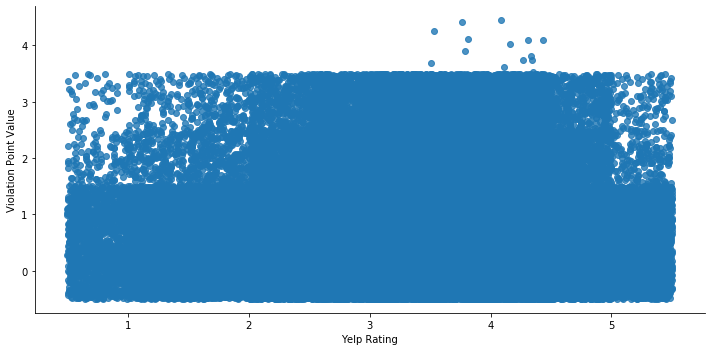

In [27]:

sns.lmplot(x = 'yelp_rating',y = 'point_value',data = df_insp_violations_yelp,fit_reg = False, height = 5 , aspect = 2, x_jitter = 0.5, y_jitter = 0.5)
plt.xlabel('Yelp Rating')
plt.ylabel('Violation Point Value');


The cell above illustrates a scatterplot comparing Violation point Value on the Y axis and Yelp Ratig on the Y. As you can ultimately see there exists no discernable trend or correlation in the data which would be seen if the underlying distributions for each variable were the same. However we can see that for the most part there is a very equal distribution of yelp ratings for each violation point value. Therefore no matter the Violation Point Value the resturaunt has an equal probabilty of being rated anything on Yelp's scale. 

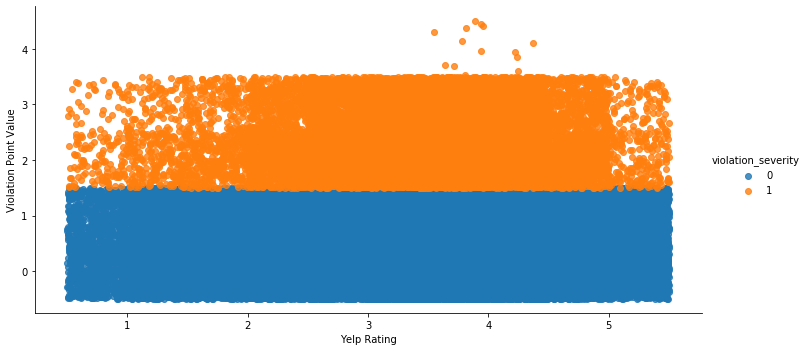

In [28]:

sns.lmplot(x = 'yelp_rating',y = 'point_value',data = df_insp_violations_yelp,fit_reg = False,hue = 'violation_severity', height = 5 , aspect = 2, x_jitter = 0.5, y_jitter = 0.5)
plt.xlabel('Yelp Rating')
plt.ylabel('Violation Point Value');

The cell above illustrates another scatter plot comparing Violation point Value on the Y axis and Yelp Ratig on the Y. However, here we have colorized the two variables for severe violation or not sever violation, by orange and blue respectively. We can see here that the trends are parallel, and like before no matter the severity of the violation there is an equal probabilty of being rated anything on Yelp's scale. However, one interesting thing to notate are the few data points that were rated a 4 in the Health Inspections Point Value system. As most of our data was skewed to the lower less severe values, there are very few values that were equal to four, so they are ultimately outliers in our data set. We can see that those few data points were rated on Yelp in the 3.5 - 4.5 data range. This is interesting, because essentially, out of all the data I had the resturaunts who had the most severe health violations were rated fairly high on Yelp.

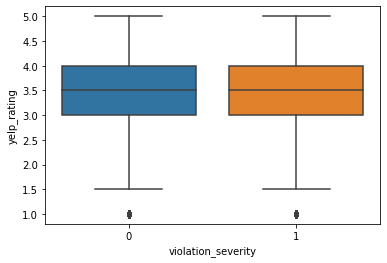

In [29]:
sns.boxplot(x = 'violation_severity', y = 'yelp_rating', data = df_insp_violations_yelp)

Above is a box plot which compares Yelp rating on the why axis with Violation severity on the x with 0 representing non severe violations, and 1 representing more severe violations. Here we can clearly see there is no variance between the two, and ultimately no discernable relationship. 

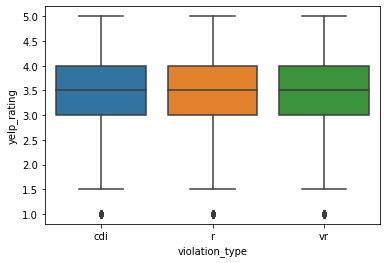

In [30]:
sns.boxplot(x = 'violation_type', y = 'yelp_rating', data = df_insp_violations_yelp)

Above is a box plot which compares Yelp rating on the why axis with Violation Type on the x. Here we can clearly see there is no variance between the two variables, and ultimately no discernable relationship. Initially I ran this test to see if maybe the type of violation played a role in rating as Health inspections categorizes violations as CDI or corrected during inspection, R or repeat, and VR when verification is required. However there was no discernable relationship here either. 

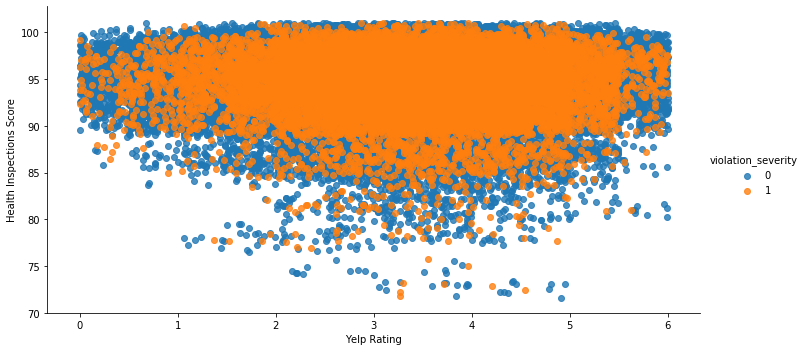

In [31]:
sns.lmplot(x = 'yelp_rating',y = 'health_inspections_score',data = df_insp_violations_yelp,fit_reg = False, hue = 'violation_severity', height = 5 , aspect = 2, x_jitter = 1, y_jitter = 1)
plt.xlabel('Yelp Rating')
plt.ylabel('Health Inspections Score');



The cell above illustrates a scatterplot omparing Healh Inspections on the Y axis and Yelp Ratig on the Y. The hue is depicted by Vilation severity again.  Essentially on this graph we can see that a few of the outliers in the previos graph likely also scored lower on their Health inspections scores as well, however there is no discernable difference between violation severity and Health Inspections Score or Yelp Rating.

In [33]:
df_insp_violations_yelp['yelp_rating'].mean()

3.4655171303659156

In [34]:
df_insp_violations_yelp['point_value'].mean()

0.7159018472850898

In [35]:
df_insp_violations_yelp['violation_severity'].mean()

0.11640664739326118

We can also see that the datframes come from different distributions by looking at mean values for Yelp Ratings, Violation point values, and Violation severity. We can see that the mean yelp rating is approximately a 3.5 which would be in the upper quantile for the data set while point value and violations are both less than 1 and are in the lower quantiles of the dataset.

In [32]:
df_insp_violations_yelp.corr()

,health_inspections_score,yelp_rating,review_count,price_dollars,point_value,num_critical,num_non_critical,violation_severity,point_value_rank,yelp_rating_rank,violation_severity_rank
health_inspections_score,1.000000,0.032258,-0.051172,-0.018455,-0.067821,-0.674067,-0.631568,-0.063315,-0.064906,0.032258,-0.063315
yelp_rating,0.032258,1.000000,0.170258,0.131834,0.002055,0.002987,-0.052626,-0.003207,0.001433,1.000000,-0.003207
review_count,-0.051172,0.170258,1.000000,0.178055,-0.009198,0.065204,0.046955,-0.009125,-0.006945,0.170258,-0.009125
price_dollars,-0.018455,0.131834,0.178055,1.000000,-0.018224,0.046533,0.029334,-0.015979,-0.017877,0.131834,-0.015979
point_value,-0.067821,0.002055,-0.009198,-0.018224,1.000000,0.012391,0.021630,0.769263,0.980957,0.002055,0.769263
num_critical,-0.674067,0.002987,0.065204,0.046533,0.012391,1.000000,0.588590,0.010670,0.010744,0.002987,0.010670
num_non_critical,-0.631568,-0.052626,0.046955,0.029334,0.021630,0.588590,1.000000,0.032068,0.016888,-0.052626,0.032068
violation_severity,-0.063315,-0.003207,-0.009125,-0.015979,0.769263,0.010670,0.032068,1.000000,0.727332,-0.003207,1.000000
point_value_rank,-0.064906,0.001433,-0.006945,-0.017877,0.980957,0.010744,0.016888,0.727332,1.000000,0.001433,0.727332
yelp_rating_rank,0.032258,1.000000,0.170258,0.131834,0.002055,0.002987,-0.052626,-0.003207,0.001433,1.000000,-0.003207


Finally, the cell below illustrates this datas correlation table. There are some values which show some correlation, but most are values we would expect to show correlation, as the relate to each other or health inspections scores. In terms of correlation for Yelp Ratings there is no variable that presents a negative or positive statistical significance, however the most statistically significant variables are Price and Review Count variables.

# Ethics & Privacy

In terms of Ethics and Privacy, I had permission to use these datasets as they are publically available, and were given to me by Professor Ellis. Essentially most of the data comes from Wake County's Health Inspections. These inspections are conducted by trained professionals. They are trained to be unbiased. However, Yelp is open to the public and in theory anyone can put biased reviews on the site. Finally, the only privacy concerns are in the Health inspections data as it includes the real names of the health inspectors, as well as the date they visited, and made the inspection.

Ultimately to address any biases in the Yelp data I decided to visualize it. In theory if the data was highly biased it would be in the resturaunts that had few reviews. However, the data had an even amount of plots in each yelp rating category for resturants that had low reviews. If the data had only outliers I could have written a line of code that would drop rows with a review_count below a threshold. I experimented with this, but ultimately decided to leave the rows in as the slight trend upward as the amount of views increased seemed like statistically significant data to keep within my data set, especially in regards to future analysis that can be drawn. Ultimtely there will always exist a few biased yelp reviews, but generally these tend to disappear as Yelps population and user database grows, and the distribution normalizes. In regards to privacy concerns with the Health inspections data, all names and personal information about the inspectors was dropped from the data. 

# Conclusion & Discussion

Essentially the goal of this study was to try and understand if Yelp ratings could be used as a metric to judge overall food safety.  Studies have been done that meausre the overall effect of health inspections over time on food safety. Essentially these studies saw a rise in mean health inspection scores over the years. Essentially I wanted to know if there is existed a metric that made this data more accesible to the individual. Data suggests that almost a majority of food borne diseases every year are a result the commercial food industry. Typically when I use yelp I am not concerned about food safety, but I am concerned about overall rating. Therefore I wanted to know that if there existed relationship between a resturants Yelp rating and their overall food safety. To quantify this I used data from Wake County's  resturant health inspections violations, and the resturant's respective Yelp ratings. I used violations because any violation in health inspections could result in a food safety issue.

The variables I used for my study were Yelp Rating, and Violation Severity. Yelp rating is an ordinal variable ranking a resturant's score or rating on a scale of 1-5 by halves. Violation severity is a categorical variable that rates a violation as relatively severe or not severe based upon the points inspectors gave each violation in their Health inspection. Because my variables were ordinal and not normally distributed, a Mann-Whitney U Test was used, due to the fact that a linear regressions model would not effectively test for a relationship. Essentially a Mann-Whitney U test will compare the distributions of two data sets of ordinal data and test if they come from an equal distribution. A Mann-Whitney U test was conducted with variables Yelp Rating, and Violation Severity.The alpha was set to 0.05, and the calculated p value was epqual to 0.0, therefore rejecting the null hypothesis. This was because the p value <  alpha. Also the mean yelp rating is approximately a 3.465 which would be in the upper quantile for the data set. While point value's mean was0.71 in the lowest quantile of the dataset.Essentially this meant that the data for both Yelp Rating, and Violation Severity came from different distributions. 

Ultimately there existed no discernable trend or correlation in the data which would be seen if the underlying distributions for each variable were the same. However we can see that for the most part there is a very equal distribution of yelp ratings for each violation point value. Therefore no matter the Violation Point Value the resturaunt has an equal probabilty of being rated anything on Yelp's scale. Essentially this means that health code violations have no effect on yelp ratings, as the distributions for the variables are not the same. This makes sense as Yelp ratings rely mostly on data regarding customer service and an individual's experience with a resturaunt, while violations refer often times to many things that lead to violations happen beyond what customers see and often deal with things like employee sanitation, or temperatures for cooking meats. A more interesting study would be a over time analysis since the creation of yelp, comparing median resturaunt Health inspection scores to their respective yelp ratings. However, that would require a different data set and a different set of variables, to see the trend over time.  

